In present notebook, we analyze if synthetic accessibility score can discriminate dofferent kinds of nodes.

Start with several auxiliary funtions.

In [2]:
%load_ext autoreload
%autoreload 2
from typing import Tuple
from main.tree import Tree, TreeTypes
from main.score import Score
from main.stats import (
    histogram_top_bottom,
    display_str,
    input_data,
    AggTuple, ScoreGetter, agg_list,
    get_roc_data
)

import string
from matplotlib import pyplot as plt
import tabulate

def f(
  ttype: list[TreeTypes],
  btype: list[TreeTypes],
  agg_tuple: AggTuple,
  score_getter: Tuple[str, ScoreGetter],
): return ttype, btype, agg_tuple, score_getter

sa, sc, ra, syba = Score.getters()
min, max, avg = agg_list
def expandable_mols(tree: Tree): return [smiles.score for smiles in tree.expandable]
def all_mols(tree: Tree): return [smiles.score for smiles in (tree.expandable + tree.in_stock)]

detailed=False

aggs = [min, max, avg]
getters = Score.getters()
ttypes = [["internal"], ["solved"]]
btypes = [["not_solved"], ["not_solved"]]

tables = get_roc_data(ttypes, btypes, all_mols, agg_list, getters)

To this end, we computed ROC curves.

['internal']  <->  ['not_solved']


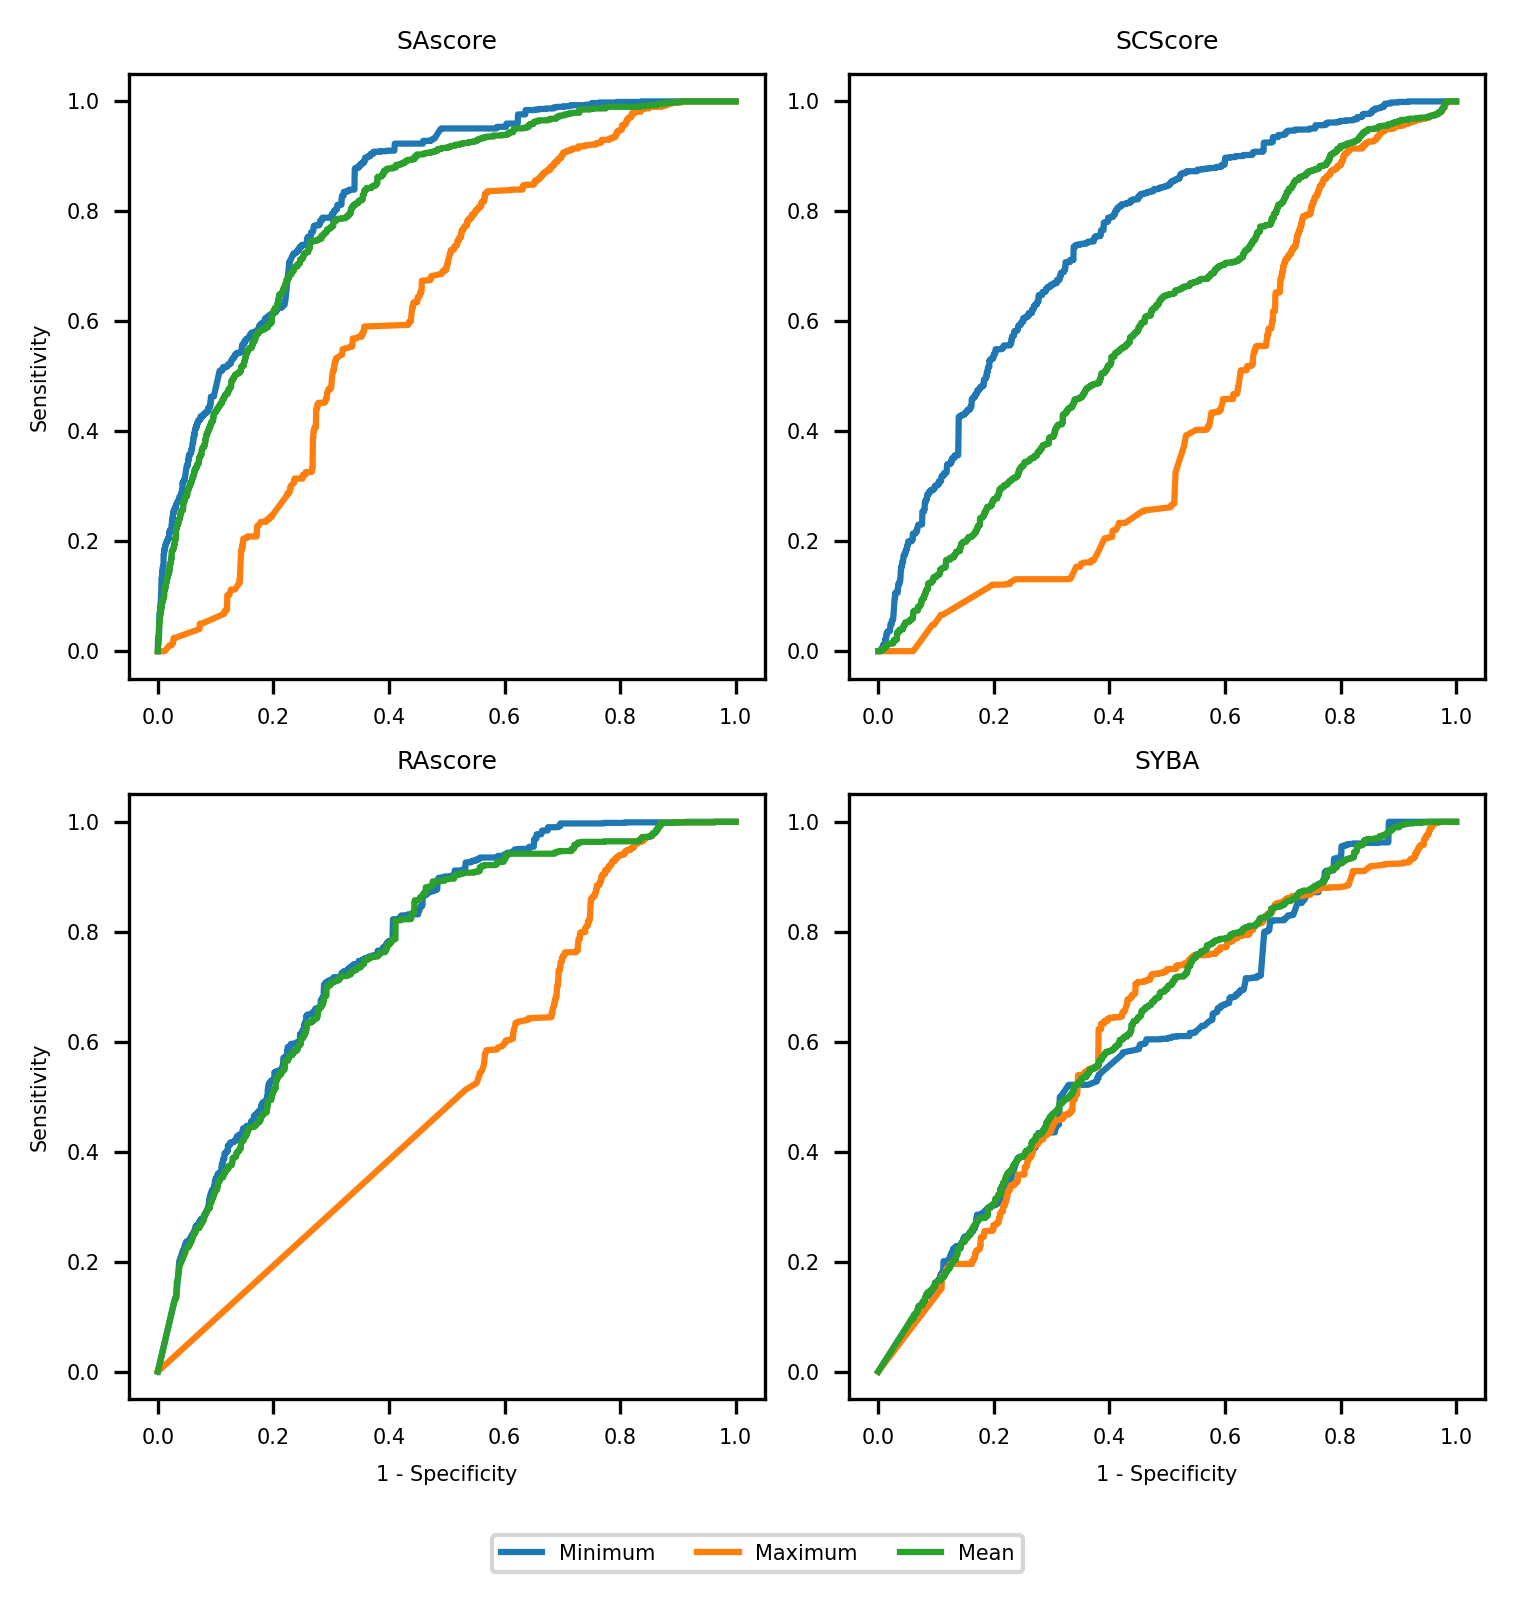

['solved']  <->  ['not_solved']


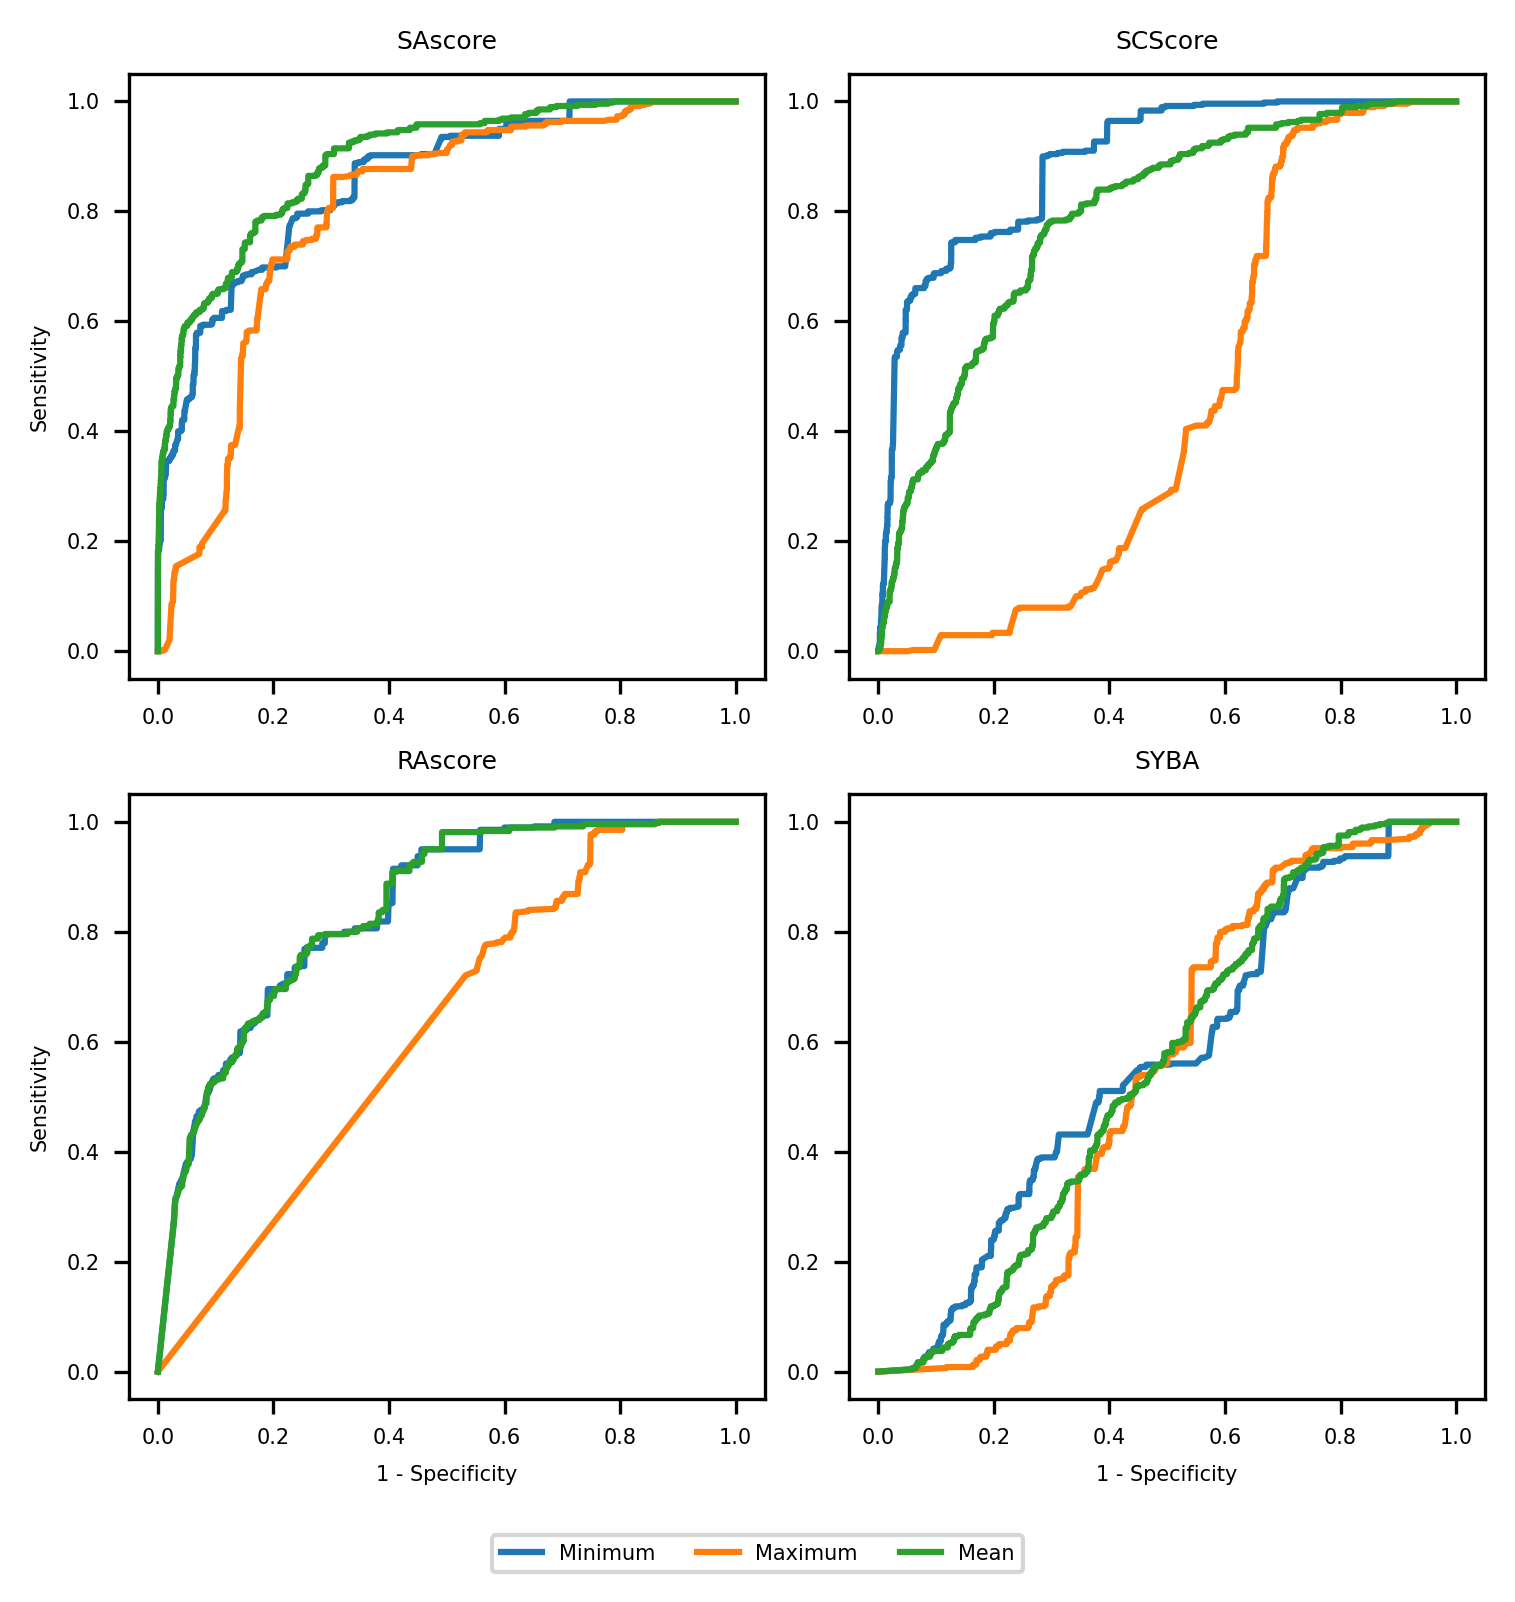

In [7]:
names = [score_name for score_name, _ in Score.getters()]
mapping = {name:i for i, name in enumerate(names)}

full_names = {"sa": "SAscore", "sc": "SCScore", "ra": "RAscore",
              "syba": "SYBA"}

agg_names = {"min": "Minimum", "max": "Maximum", "avg": "Mean"}

for table, ttype, btype in zip(tables, ttypes, btypes):
    print(ttype, " <-> ", btype)
    fig, axs = plt.subplots(2, 2, figsize=(5, 5))
    fig.set_dpi(300)
    for score_name, agg_name, _, (fpr, tpr) in table:
        index = mapping[score_name]
        ax = axs[index // 2][index % 2]
        ax.plot(fpr,tpr, label=agg_name)
        ax.set_title(full_names[score_name])
        handles, labels = ax.get_legend_handles_labels()
        if index % 2 == 0:
            ax.set_ylabel("Sensitivity")
        if index // 2 == 1:
            ax.set_xlabel("1 - Specificity")
    fig.legend(handles, [agg_names[l] for l in labels], loc='lower center',
               bbox_to_anchor=(0.5,-0.05), ncol=3)

    plt.tight_layout()
    plt.show()


And below we computed AUC-s for all ROC curves depited above.

In [8]:
for table, ttype, btype in zip(tables, ttypes, btypes):
    print(ttype, " <-> ", btype)
    display(tabulate.tabulate([[full_names[row[0]], row[1], row[2]] for row in table],
                              tablefmt='html', headers=["Score", "Node statisitc", "AUC"]))
    # Omiting -1 because it is (tpr, fpr

['internal']  <->  ['not_solved']


Score,Node statisitc,AUC
SAscore,min,0.832116
SAscore,max,0.630813
SAscore,avg,0.80906
SCScore,min,0.744839
SCScore,max,0.426398
SCScore,avg,0.585491
RAscore,min,0.774598
RAscore,max,0.52052
RAscore,avg,0.760438
SYBA,min,0.601439


['solved']  <->  ['not_solved']


Score,Node statisitc,AUC
SAscore,min,0.856258
SAscore,max,0.798973
SAscore,avg,0.891866
SCScore,min,0.892156
SCScore,max,0.443309
SCScore,avg,0.788647
RAscore,min,0.839308
RAscore,max,0.619752
RAscore,avg,0.840623
SYBA,min,0.564127
